## Library Import

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import statsmodels
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from statsmodels.tsa.stattools import arma_order_select_ic
rcParams['figure.figsize'] = 15, 6
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data Import and Indexing and Ploting

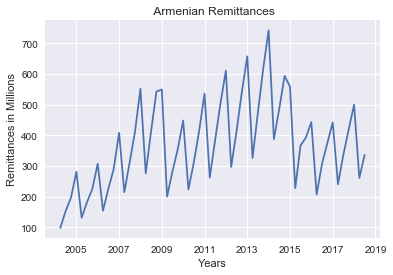

In [2]:
data=pd.read_csv('Remittances.csv')
data.date=pd.to_datetime(data['date'].str.replace(' ', '')) + pd.offsets.QuarterEnd(0)
data=data.set_index(data.date)
ts1=data['Remittances'] # Python understands and takes the index.
del(data['date'])
data.head(5)
plt.plot(ts1)
plt.title(' Armenian Remittances')
plt.xlabel('Years')
plt.ylabel('Remittances in Millions')

In [3]:
#Summary 
data.describe()

,Remittances,Global price of WTI Crude Oil,Unemployment Rate%,REER,US Real GDP growth rate%,Russian Real GDP Growth%
count,58.000000,58.000000,58.000000,58.000000,58.0000,58.000000
mean,369.024064,71.222651,11.887356,224.886379,1.9000,0.710345
std,146.092670,22.848212,5.243588,31.583418,2.3476,1.279074
min,98.053407,33.275749,5.950000,147.730000,-8.4000,-3.500000
25%,261.401469,50.199652,7.000000,210.327500,0.9250,0.150000
50%,361.188163,68.058608,9.140000,222.585000,2.2000,0.750000
75%,466.844992,93.088266,17.450000,251.630000,3.2750,1.650000
max,742.691994,123.973333,20.100000,272.530000,5.4000,3.200000


### Provides a plot of Rolling Mean and Statistics Alongside the Dickey Fuller Results

In [4]:
#Includes rolling mean and statistics
def test_stationarity(timeseries,label='Original'):    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=4)
    rolstd = pd.rolling_std(timeseries, window=4)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label=label) 
    mean = plt.plot(rolmean, color='purple', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')     
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='BIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [5]:
#Only the original Plot
def test_stationarityandplot(timeseries,label='Original'):
    orig = plt.plot(timeseries, color='blue',label=label)
    plt.title('Decomposed Series')
    plt.legend(loc='best')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='BIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).std()
  """


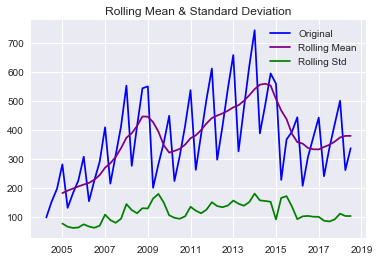

Results of Dickey-Fuller Test:
Test Statistic                 -2.767303
p-value                         0.063098
#Lags Used                      4.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


In [6]:
#Applying Remittances to the function above    
test_stationarity(data['Remittances'])

In [7]:
ts_oil=data['Global price of WTI Crude Oil']
ts_unemr=data['Unemployment Rate%']
ts_reer=data['REER']
ts_usa_gdp=data['US Real GDP growth rate%']
ts_russian_gdp=data['Russian Real GDP Growth%']

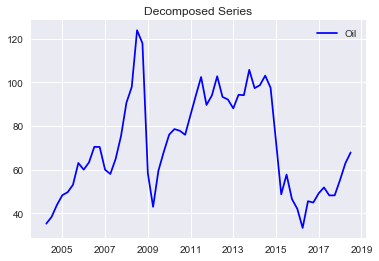

Results of Dickey-Fuller Test:
Test Statistic                 -3.018734
p-value                         0.033181
#Lags Used                      1.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


In [8]:
#Stationarity for Global price of WTI Crude Oil.
test_stationarityandplot(ts_oil,label='Oil')

### Instead of plotting one by one, we will define a function to calculate Dickey Fuller for all the variables.

In [9]:
for column in data:
    dftest = adfuller(data[column],autolag='BIC')  
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print('Dickey Fuller Test for',column)
    print(dfoutput)

Dickey Fuller Test for Remittances
Test Statistic                 -2.767303
p-value                         0.063098
#Lags Used                      4.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64
Dickey Fuller Test for Global price of WTI Crude Oil
Test Statistic                 -3.018734
p-value                         0.033181
#Lags Used                      1.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64
Dickey Fuller Test for Unemployment Rate%
Test Statistic                 -1.452909
p-value                         0.556665
#Lags Used                      0.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)

### Estimating and Eliminating Trend by smoothing

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


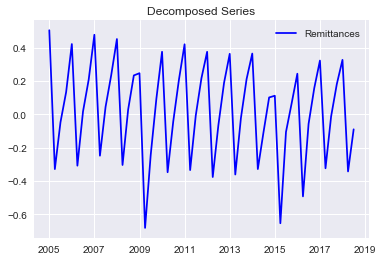

Results of Dickey-Fuller Test:
Test Statistic                 -3.724932
p-value                         0.003776
#Lags Used                      4.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [10]:
# Remove trend for Remittances
ts1_log=np.log(ts1)
moving_avg=pd.rolling_mean(ts1_log,4)
ts1_log_mov_average_diff=ts1_log-moving_avg
ts1_log_mov_average_diff.dropna(inplace=True)
test_stationarityandplot(ts1_log_mov_average_diff,label='Remittances')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


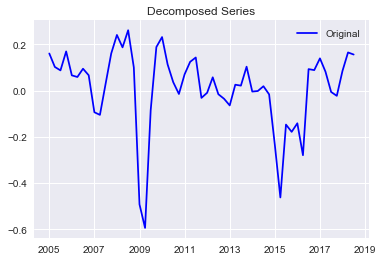

Results of Dickey-Fuller Test:
Test Statistic                 -5.116622
p-value                         0.000013
#Lags Used                      1.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


In [11]:
#Remove trend for Oil
ts_oil_log=np.log(ts_oil)
ts_oil_moving_avg=pd.rolling_mean(ts_oil_log,4)
ts_oil_log_mov_diff=ts_oil_log-ts_oil_moving_avg
ts_oil_log_mov_diff.dropna(inplace=True)
test_stationarityandplot(ts_oil_log_mov_diff)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=4,min_periods=0,adjust=True,ignore_na=False).mean()
  


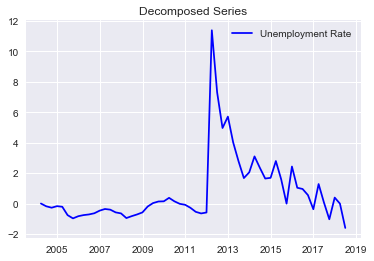

Results of Dickey-Fuller Test:
Test Statistic                 -3.305199
p-value                         0.014648
#Lags Used                      0.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


In [12]:
#Remooving trend for unemployment
expwighted_avg = pd.ewma(ts_unemr, halflife=4)
ts_unemr_ewma_diff = ts_unemr-expwighted_avg
test_stationarityandplot(ts_unemr_ewma_diff,label='Unemployment Rate')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=4,min_periods=0,adjust=True,ignore_na=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


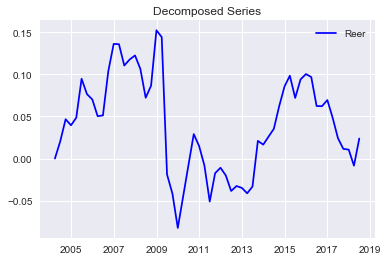

Results of Dickey-Fuller Test:
Test Statistic                 -2.270984
p-value                         0.181497
#Lags Used                      0.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


In [13]:
#Removing Trend for Armenian Real Exchange Rate.
ts_log_reer=np.log(ts_reer)
expwighted_avg = pd.ewma(ts_log_reer, halflife=4)
ts_reer_log_ewma_diff = ts_log_reer-expwighted_avg
test_stationarityandplot(ts_reer_log_ewma_diff,label='Reer')

In [14]:
#The Results from detrending US Real GDP and Russian Real GDP are not plotted.

In [15]:
# The results from trend removal are not good enough for proceeding, so we decompose the series to remove
# both trend and seasonality.

## Decomposing

In [16]:
# All of the decomposed series are highly stationary.

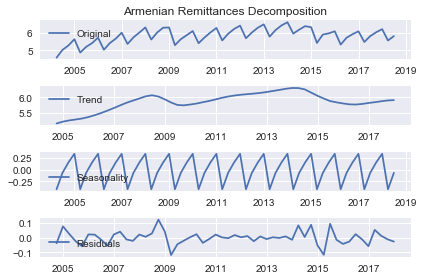

In [17]:
#Decomposing Remittances
decomposition = seasonal_decompose(ts1_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
ts1_log_decompose = residual
ts1_log_decompose.dropna(inplace=True)

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.title('Armenian Remittances Decomposition')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

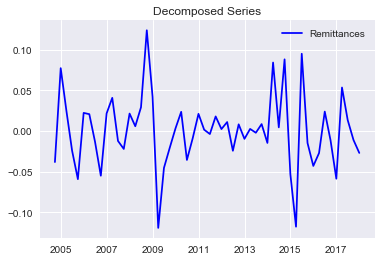

Results of Dickey-Fuller Test:
Test Statistic                -7.414285e+00
p-value                        7.001566e-11
#Lags Used                     1.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


In [18]:
test_stationarityandplot(ts1_log_decompose,label='Remittances')

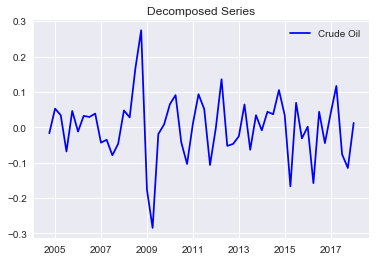

Results of Dickey-Fuller Test:
Test Statistic                -6.983604e+00
p-value                        8.073977e-10
#Lags Used                     1.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


In [19]:
#Decomposing Crude-OIL
decomposition2 = seasonal_decompose(ts_oil_log)
trend2 = decomposition2.trend
seasonal2 = decomposition2.seasonal
residual2 = decomposition2.resid
ts2_log_decompose = residual2
ts2_log_decompose.dropna(inplace=True)
test_stationarityandplot(ts2_log_decompose,label='Crude Oil')

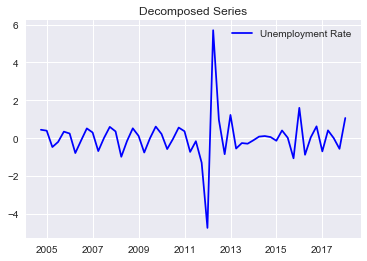

Results of Dickey-Fuller Test:
Test Statistic                -8.456859e+00
p-value                        1.606144e-13
#Lags Used                     1.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


In [20]:
#Decomposing Unemployment Rate
decomposition3 = seasonal_decompose(ts_unemr)
trend3 = decomposition3.trend
seasonal3 = decomposition3.seasonal
residual3 = decomposition3.resid
ts3_decompose = residual3
ts3_decompose.dropna(inplace=True)
test_stationarityandplot(ts3_decompose, label='Unemployment Rate')

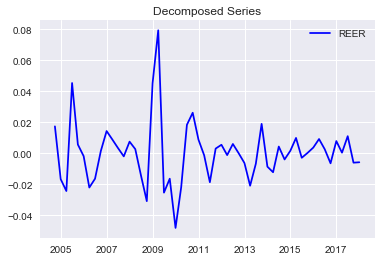

Results of Dickey-Fuller Test:
Test Statistic                -6.944267e+00
p-value                        1.006605e-09
#Lags Used                     3.000000e+00
Number of Observations Used    5.000000e+01
Critical Value (1%)           -3.568486e+00
Critical Value (5%)           -2.921360e+00
Critical Value (10%)          -2.598662e+00
dtype: float64


In [21]:
#Decomposing Real Exchange Rate
decomposition4 = seasonal_decompose(ts_log_reer)
trend4 = decomposition4.trend
seasonal4 = decomposition4.seasonal
residual4 = decomposition4.resid
ts4_log_decompose = residual4
ts4_log_decompose.dropna(inplace=True)
test_stationarityandplot(ts4_log_decompose,label='REER')

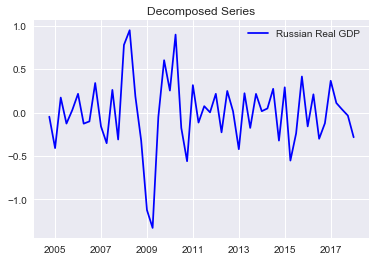

Results of Dickey-Fuller Test:
Test Statistic                -8.079996e+00
p-value                        1.470157e-12
#Lags Used                     3.000000e+00
Number of Observations Used    5.000000e+01
Critical Value (1%)           -3.568486e+00
Critical Value (5%)           -2.921360e+00
Critical Value (10%)          -2.598662e+00
dtype: float64


In [22]:
#Decomposing Real GDP
decomposition5 = seasonal_decompose(ts_russian_gdp)
trend5 = decomposition5.trend
seasonal5 = decomposition5.seasonal
residual5 = decomposition5.resid
ts5_decompose = residual5
ts5_decompose.dropna(inplace=True)
test_stationarityandplot(ts5_decompose,label='Russian Real GDP')

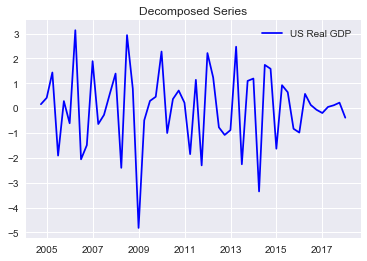

Results of Dickey-Fuller Test:
Test Statistic                -9.397566e+00
p-value                        6.313897e-16
#Lags Used                     1.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


In [23]:
#Decompsing US GDP
decomposition6 = seasonal_decompose(ts_usa_gdp)
trend6 = decomposition6.trend
seasonal6 = decomposition6.seasonal
residual6 = decomposition6.resid
ts6_decompose = residual6
ts6_decompose.dropna(inplace=True)
test_stationarityandplot(ts6_decompose,label='US Real GDP')

In [24]:
## Remittances, Crude OIl and Real Exchange Rate were logged before decomposing. This would allow
## for better coefficient interpretation and more stationary results.

In [25]:
# We now make a dataframe with all the stationary variables.
# We can see that all the variables are highly stationary.

In [26]:
#Making a dataframe
stationaryframe=pd.DataFrame()
stationaryframe['stremittances']=ts1_log_decompose
stationaryframe['crudeoil']=ts2_log_decompose
stationaryframe['unemployment_rate']=ts3_decompose
stationaryframe['armenian_real_effective_exchange_rate']=ts4_log_decompose
stationaryframe['Russian_Real_GDP']=ts5_decompose
stationaryframe['US_Real_GDP']=ts6_decompose
stationaryframe['secondlagofremittances']=ts1_log_decompose.shift(2)
stationaryframe.shape[0]
stationaryframe.dropna(inplace=True)

In [27]:
stationaryframe.shape[0]

52

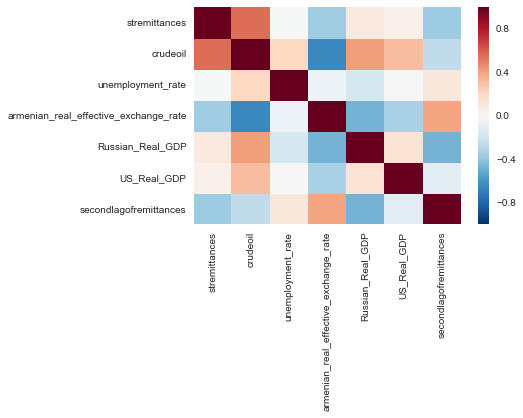

In [28]:
#Plotting Correlations
sns.heatmap(stationaryframe.corr())

## Plotting Autocorrelations for Decomposed Remittances

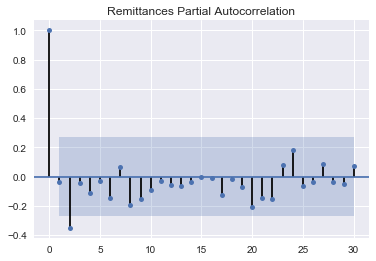

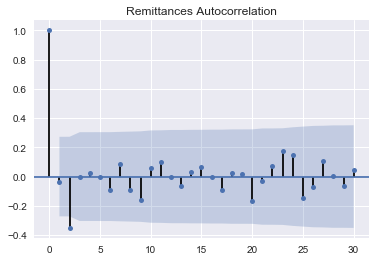

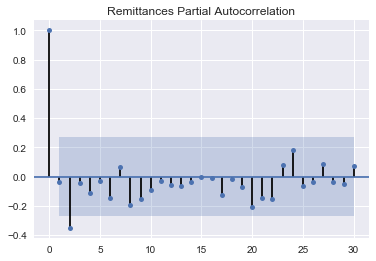

In [29]:
#Partial Autocorrelations and Autocorrelations for Remittances
plot_acf(stationaryframe.stremittances,lags=30,title='Remittances Autocorrelation')
plot_pacf(stationaryframe.stremittances,lags=30,title='Remittances Partial Autocorrelation')

In [30]:
# One way of finding out the order of p and q for plotting. Accorind to the plots Yt-2 and Et-2 should
# be included in the model.

## AIC and BIC scores

In [31]:
# According to AIC and BIC, the order of ARMA should be 0,2.
# 0 lags are results are presented as well in the matrix.

In [32]:
results_aic=arma_order_select_ic(stationaryframe.stremittances, max_ar=3,max_ma=3,ic='aic')
print(results_aic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


{'aic':             0           1           2           3
0 -172.604670 -170.833159 -179.894617 -178.825948
1 -170.673527 -177.638467 -179.320157 -177.493453
2 -175.387676 -177.730461         NaN -176.162608
3 -173.486674 -172.979908 -175.813316 -174.176718, 'aic_min_order': (0, 2)}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [33]:
results_bic=arma_order_select_ic(stationaryframe.stremittances, max_ar=3,max_ma=3,ic='bic')
print(results_bic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


{'bic':             0           1           2           3
0 -168.702183 -164.979428 -172.089643 -169.069730
1 -164.819796 -169.833492 -169.563938 -165.785991
2 -167.582701 -167.974242         NaN -162.503902
3 -163.730455 -161.272446 -162.154610 -158.566768, 'bic_min_order': (0, 2)}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Building an ARMA(0,2)model

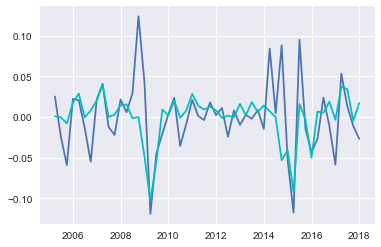

In [34]:
model = ARMA(stationaryframe.stremittances,order=(0,2)) 
results_ARMA = model.fit()
plt.plot(stationaryframe.stremittances)
plt.plot(results_ARMA.fittedvalues, color='c')

In [35]:
#Checking the normality of ARMA(0,2) model, We can see the residuals are highly not normal.

In [36]:
#Shapiro Test
results=shapiro(results_ARMA.resid)
print('Test Statistics is:',results[0])
print('P Value is:', results[1])

Test Statistics is: 0.8215885758399963
P Value is: 1.984847585845273e-06


In [37]:
#As the model's residuals are highly not normal, we start to select and check the orders of 
# AIC and BIC from best to worst, in order to identify the model which has normal errors.

In [38]:
#After trying different models, we find the model with normal errors is ARMA(0,1).

### Identifiying the model with normally  distributed errors.

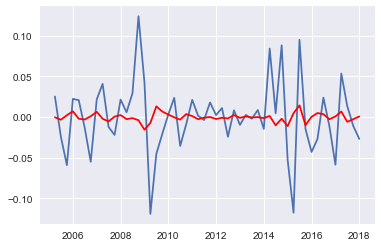

In [39]:
model = ARMA(stationaryframe.stremittances,order=(0,1)) 
results_ARMA = model.fit()
plt.plot(stationaryframe.stremittances)
plt.plot(results_ARMA.fittedvalues, color='r')

In [40]:
results=shapiro(results_ARMA.resid)
print('Test Statistics is:',results[0])
print('P Value is:', results[1])

Test Statistics is: 0.957343339920044
P Value is: 0.06005516275763512


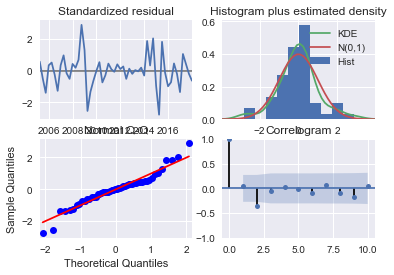

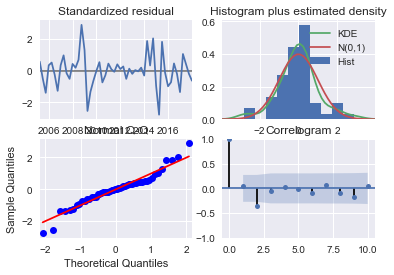

In [41]:
#Now we go on to include exogenous variables.
#For making a model we use Sarimax, which is a seasonaliy adjusted ARIMAX model,as it provides
#better plot diagnostics and has a robust error function.
model = SARIMAX(stationaryframe['stremittances'], order=(0,0,1))
results=model.fit(cov_type='robust')
results.plot_diagnostics()

In [42]:
# We manually include second autoregressive lag as Python does not allow to include nonconsecutive lags.
# But we loose two observations because of removing missing values for 2 period shifting.

## Including Exogenous Variables and Second Autoregressive Lag

## Final Model

In [43]:
model = SARIMAX(stationaryframe['stremittances'], order=(0,0,1),trend='c',exog=stationaryframe.loc[:,['crudeoil','Russian_Real_GDP','unemployment_rate','secondlagofremittances']])                                                                                          
                                                                                     
results_sarimax=model.fit(cov_type='robust')
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:          stremittances   No. Observations:                   52
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 105.784
Date:                Thu, 20 Dec 2018   AIC                           -197.567
Time:                        22:52:41   BIC                           -183.909
Sample:                    03-31-2005   HQIC                          -192.331
                         - 12-31-2017                                         
Covariance Type:               robust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  0.0003      0.003      0.098      0.922      -0.006       0.007
crudeoil                   0.3375      0.056      6.009      0.000       0.227       0.448
Russian_Real_GDP          -0.0423      0.015     -2.842      0.004      -0.071      -0.013
unemployment_rate         -0.0069      0.002     -2.951      0.003      -0.012      -0.002
secondlagofremittances    -0.3269      0.126     -2.595      0.009      -0.574      -0.080
ma.L1                     -0.2207      0.127     -1.734      0.083      -0.470       0.029
sigma2                     0.0010      0.000      5.518      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       50.41   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.13   Prob(JB):                         0.78
Heteroskedasticity (H):               1.35   Skew:                             0.19
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

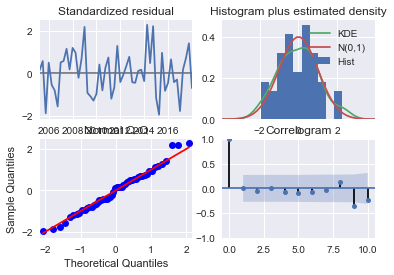

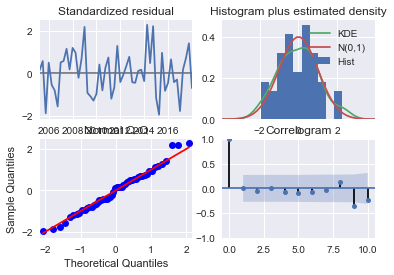

In [44]:
#Model Diagnostics
results_sarimax.plot_diagnostics()

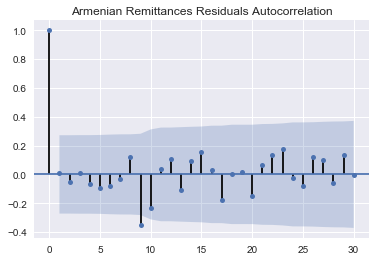

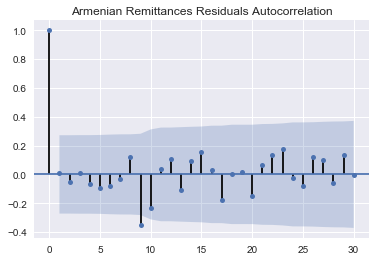

In [45]:
# Plotting autocorrelation of residuals separately.
plot_acf(results_sarimax.resid,lags=30,title='Armenian Remittances Residuals Autocorrelation')
#10th lag is outside the range but we do not do any further actions.

## Shapiro test for normality

In [46]:
#Errors are highly normal.
shapiro_final=shapiro(results_sarimax.resid)
print('The Test statistics is:',shapiro_final[0])
print('The P value is:',shapiro_final[1])

The Test statistics is: 0.9811298847198486
The P value is: 0.5749896168708801


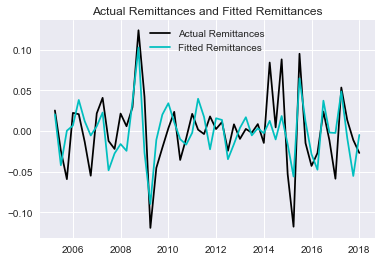

In [47]:
#Plot of Fitted model Results and Actual Results.
plt.plot(stationaryframe['stremittances'],color='black',label='Actual Remittances')
plt.plot(results_sarimax.fittedvalues, color='c',label='Fitted Remittances')
plt.legend()
plt.title('Actual Remittances and Fitted Remittances')

### Taking the first order lags of independent variables to account for reverse causality.

In [48]:
stationaryframe=pd.DataFrame()
stationaryframe['stremittances']=ts1_log_decompose
stationaryframe['crudeoil']=ts2_log_decompose.shift(1)
stationaryframe['unemployment_rate']=ts3_decompose.shift(1)
stationaryframe['armenian_real_effective_exchange_rate']=ts4_log_decompose.shift(1)
stationaryframe['Russian_Real_GDP']=ts5_decompose.shift(1)
stationaryframe['US_Real_GDP']=ts6_decompose.shift(1)
stationaryframe['stremittancessecondarlag']=ts1_log_decompose.shift(2)
stationaryframe.dropna(inplace=True)
stationaryframe.shape[0]

52

In [49]:
model = SARIMAX(stationaryframe['stremittances'], order=(0,0,1),trend='c',exog=stationaryframe.loc[:,['unemployment_rate','crudeoil','stremittancessecondarlag','Russian_Real_GDP']])                                                                                                                                                                          
results_sarimax=model.fit(cov_type='robust')
results_sarimax.summary()
shapiro_final=shapiro(results_sarimax.resid)
print('The Test statistics is:',shapiro_final[0])
print('The P value is:',shapiro_final[1]) # errors are not normal.

The Test statistics is: 0.9423932433128357
The P value is: 0.014026167802512646


In [50]:
#Excluding Russian Real GDP.
model = SARIMAX(stationaryframe['stremittances'], order=(0,0,1),trend='c',exog=stationaryframe.loc[:,['unemployment_rate','crudeoil','stremittancessecondarlag']])                                                                                                                                                                          
results_sarimax=model.fit(cov_type='robust')
results_sarimax.summary()
shapiro_final=shapiro(results_sarimax.resid)
print('The Test statistics is:',shapiro_final[0])
print('The P value is:',shapiro_final[1]) # errors are not normal.

The Test statistics is: 0.9450575709342957
The P value is: 0.018070802092552185


In [51]:
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:          stremittances   No. Observations:                   52
Model:               SARIMAX(0, 0, 1)   Log Likelihood                  95.341
Date:                Thu, 20 Dec 2018   AIC                           -178.682
Time:                        22:52:44   BIC                           -166.974
Sample:                    03-31-2005   HQIC                          -174.193
                         - 12-31-2017                                         
Covariance Type:               robust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept                   -0.0002      0.004     -0.044      0.965      -0.007       0.007
unemployment_rate           -0.0052      0.003     -1.912      0.056      -0.011       0.000
crudeoil                     0.1836      0.067      2.740      0.006       0.052       0.315
stremittancessecondarlag    -0.3103      0.164     -1.896      0.058      -0.631       0.010
ma.L1                       -0.3446      0.144     -2.395      0.017      -0.627      -0.063
sigma2                       0.0015      0.000      3.712      0.000       0.001       0.002
===================================================================================
Ljung-Box (Q):                       33.25   Jarque-Bera (JB):                 9.25
Prob(Q):                              0.77   Prob(JB):                         0.01
Heteroskedasticity (H):               2.09   Skew:                             0.54
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Quasi-maximum likelihood covariance matrix used for robustness to some misspecifications; calculated using the observed information matrix (complex-step) described in Harvey (1989).
"""

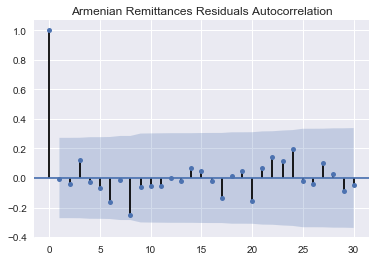

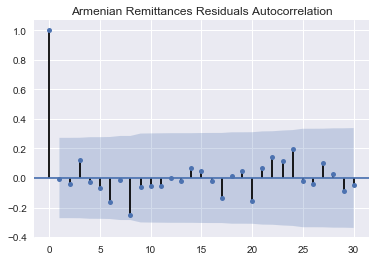

In [52]:
#Though all the lags are in the interval, errors are not normal and results are not interpretable.
plot_acf(results_sarimax.resid,lags=30,title='Armenian Remittances Residuals Autocorrelation')